In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## โจทย์
ในฐานะ Data Scientist ของบริษัท ThipAdsaiwhor (ทิพย์แอดไซหว่อ) จากประเทศจีน

ที่ทำธุรกิจโรงแรม และ ที่พักต่างๆ ในประเทศจีน และต่างประเทศ

คุณจะต้องทำการสร้าง AI เพื่อตรวจสอบรีวิวของลูกค้าที่เข้าพักในโรงแรมของเรา

หากใครมีแนวโน้วที่จะให้คะแนนรีวิวต่ำ เราจะได้ลบ Review นั้นออกไปจากระบบ :D

In [3]:
df = pd.read_csv(
    "C:/Users/thatt/OneDrive/Documents/Coding Project/MyPyhton/Test/Machine Learning Camp/Project/nlp/text_regression/data/hotel_reviews.csv"
)
df.head()

,review,rating
0,good choice did overnight stay saturday night ...,3.924972
1,"n't 4 stars, think not.truth told punta cana b...",1.786764
2,"excellent, excellent location close times squa...",4.751683
3,good all-around value stayed hotel 3 nights be...,3.930100
4,best bet shinjuku need/want shinjuku best big ...,3.944227


### วิเคราะห์ข้อมูล

In [4]:
df.describe()

,rating
count,1000.000000
mean,3.685589
std,1.276498
min,0.501412
25%,2.884007
50%,3.919690
75%,4.725694
max,4.998959


(array([ 78.,  87., 109., 280., 446.]),
 array([0.50141232, 1.40092165, 2.30043099, 3.19994032, 4.09944965,
        4.99895899]),
 <BarContainer object of 5 artists>)

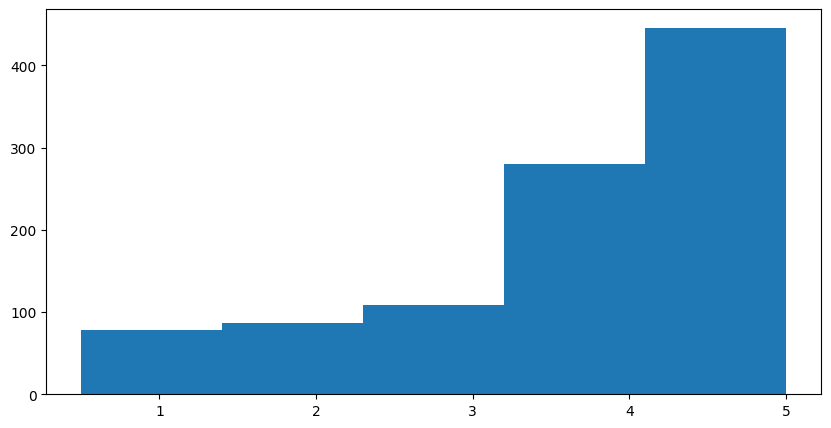

In [5]:
plt.figure(figsize=(10, 5))
plt.hist(df["rating"], bins=5)

## ทำการ Vectorize ข้อมูล

In [6]:
# แบ่งข้อมูลเป็น 2 ส่วน คือ ข้อมูลสำหรับ Train และ Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df["review"], df["rating"], test_size=0.30, random_state=0
)

In [7]:
from pythainlp.tokenize import word_tokenize  # ตัวตัดคำภาษาไทย (ที่ตัดภาษาอังกฤษได้ด้วย)

# ทดสอบการตัดคำ
word_tokenize("Test English Word Tokenize")  # ตัดคำภาษาอังกฤษได้ปกติ

['Test', ' ', 'English', ' ', 'Word', ' ', 'Tokenize']

#### สร้าง Vectorize ข้อมูล Feature (X) ด้วย Bag of Words

In [9]:
# เราจะทำการลองสร้าง Bag of Words ด้วยตัวเอง
all_words = []
for sentence in X_train:
    all_words.extend(word_tokenize(sentence))  # ตัดคำแล้วเก็บคำทั้งหมดไว้ใน all_words

# ทำใ้ห้คำซ้ำไม่เกิดขึ้น ด้วยการแปลงเป็น set แล้วกลับมาเป็น list อีกครั้ง
all_words = list(set(all_words))
print("จำนวนคำทั้งหมดใน Bag of Words:", len(all_words))


def encode_words(text):  # สร้างฟังก์ชันสำหรับ encode คำให้เป็น Bag of Words
    words = word_tokenize(text)  # ตัดคำในประโยค เพื่อเปรียบเทียบกับ Bag of Words
    encoded_words = []
    for word in all_words:  # วนลูปเช็คคำที่อยู่ใน Bag of Words
        if word in words:  # ถ้าคำใน Bag of Words อยู่ในประโยค
            encoded_words.append(1)  # เพิ่มค่า 1 ใน list
        else:  # ถ้าคำใน Bag of Words ไม่อยู่ในประโยค
            encoded_words.append(0)  # เพิ่มค่า 0 ใน list
    return encoded_words  # ส่งค่ากลับเป็น list ของคำที่ถูก encode แล้ว ex. [0, 1, 0, 1, 0, 0, 0, 0, 0, 0]


# ทดสอบการทำงานของฟังก์ชัน encode_words
print(encode_words("Something in english"))

จำนวนคำทั้งหมดใน Bag of Words: 10203
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### สร้าง Vectorize ข้อมูล Label (Y) (ไม่ต้องทำ)

In [10]:
df["rating"].unique()  # เราไม่จำเป็นต้อง encode คอลัมน์ rating เพราะมันเป็นตัวเลขแล้ว

array([3.92497192, 1.78676352, 4.75168334, 3.93009964, 3.94422696,
       4.93974845, 4.97914468, 4.8200111 , 3.53318895, 3.98098876,
       4.79649861, 2.681935  , 0.96462792, 1.55794442, 3.56385684,
       4.67557541, 4.85822687, 3.80959365, 2.51503943, 0.82732835,
       3.96566327, 4.54343976, 4.85887359, 4.84195472, 1.80893443,
       4.71499565, 2.74544062, 4.81420164, 3.63937349, 4.60381634,
       4.77495391, 3.98590237, 4.70401374, 3.55109929, 4.53725974,
       3.56903025, 1.51679772, 4.68929105, 4.92858413, 3.52721805,
       0.97614739, 3.72477118, 3.54757048, 3.87728243, 4.86118095,
       4.51145264, 0.66900183, 4.50480226, 2.61016984, 3.80280044,
       3.92100954, 3.60117211, 3.97880929, 3.93857077, 4.96138242,
       2.98516529, 3.5103256 , 4.50141876, 4.72400824, 4.89566702,
       4.7070588 , 4.96943677, 3.81035038, 3.50767345, 4.6345231 ,
       4.88162088, 4.5275503 , 3.55913013, 3.57356764, 4.65801689,
       1.780022  , 4.96556952, 4.996259  , 0.68523224, 4.64485

In [11]:
# ลองดูหน้าตาของ Y
y_train

105    3.510929
68     3.573568
479    0.562655
399    2.668297
434    3.819455
         ...   
835    0.659999
192    1.915971
629    3.741708
559    0.776855
684    1.651007
Name: rating, Length: 700, dtype: float64

#### Vectorize ข้อมูลทั้งหมด (Train, Test)

In [12]:
X_train_encoded = [
    encode_words(sentence) for sentence in X_train
]  # ทำการ encode ข้อมูล Train
X_test_encoded = [
    encode_words(sentence) for sentence in X_test
]  # ทำการ encode ข้อมูล Test
y_train_encoded = y_train  # ไม่ต้อง encode คอลัมน์ rating เพราะมันเป็นตัวเลขแล้ว
y_test_encoded = y_test  # ไม่ต้อง encode คอลัมน์ rating เพราะมันเป็นตัวเลขแล้ว
# แปลงข้อมูลเป็น NumPy array
X_train_encoded = np.array(X_train_encoded)
X_test_encoded = np.array(X_test_encoded)
y_train_encoded = np.array(y_train_encoded)
y_test_encoded = np.array(y_test_encoded)

In [14]:
# ทดสอบการทำงานของการแปลงข้อมูลเป็น NumPy array
print(X_train_encoded.shape)
print(X_test_encoded.shape)
print(y_train_encoded.shape)
print(y_test_encoded.shape)

(700, 10203)
(300, 10203)
(700,)
(300,)


### เริ่มสร้างโมเดล

In [15]:
# Text -> regression model -> rating
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train_encoded, y_train_encoded)

DecisionTreeRegressor()

In [18]:
from sklearn.metrics import mean_absolute_error

# ทดสอบการทำงานของโมเดล
train_predictions = model.predict(X_train_encoded)
test_predictions = model.predict(X_test_encoded)
# วัดผลด้วย Mean Absolute Error (MAE)
print("Train MAE:", round(mean_absolute_error(y_train_encoded, train_predictions), 4))
print("Test MAE:", round(mean_absolute_error(y_test_encoded, test_predictions), 4))

Train MAE: 0.0
Test MAE: 1.0328


In [19]:
train_predictions

array([3.51092889, 3.57356764, 0.56265496, 2.66829673, 3.81945498,
       3.60097337, 4.74309884, 4.7413588 , 3.690096  , 2.6728794 ,
       2.93489376, 4.82043622, 0.87760427, 3.96566327, 3.99733312,
       4.918978  , 4.99274394, 3.85996005, 4.96556952, 3.80280044,
       2.75148896, 0.83590546, 4.83008804, 3.5930799 , 4.77308032,
       4.76672263, 2.61016984, 2.50309251, 4.6425392 , 4.76898015,
       3.78724306, 3.78199159, 4.6345231 , 0.52712881, 3.97880929,
       4.77003392, 0.79344756, 3.91837099, 4.94831171, 4.9294466 ,
       3.92511402, 4.75446053, 0.98574239, 0.96462792, 4.72899796,
       4.70566716, 3.84542283, 0.66900183, 3.54433733, 4.80179513,
       3.60892562, 2.67394879, 4.7404475 , 3.7691929 , 3.96022283,
       4.98984814, 2.83630743, 3.7229509 , 4.60879348, 4.58873559,
       3.77695875, 3.80959365, 3.62604594, 3.96069886, 3.67899116,
       4.73244799, 3.77523876, 4.98306995, 3.60405339, 4.79461444,
       4.96687084, 1.50916734, 4.69965702, 4.87727824, 3.64185